<a href="https://colab.research.google.com/github/AlexanderPico/retrondb-notebooks/blob/main/workflow-summarize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workflow: Database Summary
This worflow summarizes the contents of the Retron Database

### If running in Colab
You'll need to upload retrondb.py into the `contents` folder using the GUI on the left. And also install these dependencies into your Colab instance.

In [ ]:
!pip install pymongo
!pip install dnspython
!pip install python-dotenv

### Connecting to the database
If you are not sure how to do this, review `getting-started.ipynb`.

In [1]:
import retrondb as rdb
dbr = rdb.connect_retronDB()  # connects to the real database by default, not 'sandbox'


 Success: Connected to retronDB with 110 retrons



### DataFrame summaries
The default returns from `retrondb` functions are pandas.DataFrames, so we can apply all the cool stuff you'd normally use to explore a DataFrame.

In [5]:
retron_df = rdb.get_all_retrons(dbr)

# information on property names and counts
retron_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   _id                        110 non-null    object
 1   node                       110 non-null    object
 2   ncrna                      95 non-null     object
 3   ensemble prediction        43 non-null     object
 4   rtdna (sequencing values)  4 non-null      object
 5   rt/cladea                  69 non-null     object
 6   retron (sub)b              64 non-null     object
 7   msr/msd familiyc           43 non-null     object
 8   rt-dna production          95 non-null     object
 9   bacterial editing          95 non-null     object
 10  mammalian editing group    95 non-null     object
 11  accesione                  68 non-null     object
 12  bacterial vector           68 non-null     object
 13  class                      66 non-null     object
 14  cluster/do

In [7]:
# describe all properties
retron_df.describe()

,_id,node,ncrna,ensemble prediction,rtdna (sequencing values),rt/cladea,retron (sub)b,msr/msd familiyc,rt-dna production,bacterial editing,...,class,cluster/domaind,domain,family,genus,order,phylum,retron namef,species/strain,taxon code
count,110,110,95,43,4,69,64,43,95,95,...,66,67,68,65,63,65,68,54,68,68
unique,110,110,95,43,4,12,20,16,64,63,...,11,23,1,32,40,22,6,35,58,57
top,62f1b841959907d83045e641,1,AATAATCTTACGCGGATAGAAATGTAATTATCGGTTGTTAGGAGAT...,((((((((.........((((((((((......)))).)))))).(...,0.00003;0.00003;0.00003;0.00006;0.00006;0.0000...,1,II-A1,IA/IIA1,4,78,...,Gammaproteobacteria,42_2,Bacteria,Enterobacteriaceae,Escherichia,Enterobacterales,Proteobacteria,X,Escherichia coli,670897
freq,1,1,1,1,1,14,8,11,5,4,...,36,8,68,19,10,20,51,20,7,8


In [47]:
# describe a numeric property
import pandas as pd
rtdna_prod_str =[x for x in retron_df['rt-dna production'] if isinstance(x,str)] #exclude NaN float values
rtdna_prod_ints = [int(p) for p in rtdna_prod_str] #cast to int
pd.Series(rtdna_prod_ints).describe() #describe list of ints as a Series

count     95.000000
mean      48.442105
std       31.609558
min        0.000000
25%       20.500000
50%       46.000000
75%       78.000000
max      100.000000
dtype: float64

In [53]:
# count categorical property values
retron_df['msr/msd familiyc'].value_counts()

IA/IIA1                  11
IC                        5
IIIIA3                    5
IIIA1                     3
IX                        3
XIII (Ne144)              3
Ec107-like                2
V                         2
XIII (Mx162)              2
IV                        1
IB2 (Proteobacteria)      1
IIIIA2                    1
IIA3 (Proteobacteria)     1
XIII (Mx65)               1
A                         1
B                         1
Name: msr/msd familiyc, dtype: int64

In [63]:
# frequency of categorical property values
fam_freq = retron_df['msr/msd familiyc'].value_counts(normalize=True)
fam_freq

Index(['IA/IIA1', 'IC', 'IIIIA3', 'IIIA1', 'IX', 'XIII (Ne144)', 'Ec107-like',
       'V', 'XIII (Mx162)', 'IV', 'IB2 (Proteobacteria)', 'IIIIA2',
       'IIA3 (Proteobacteria)', 'XIII (Mx65)', 'A', 'B'],
      dtype='object')

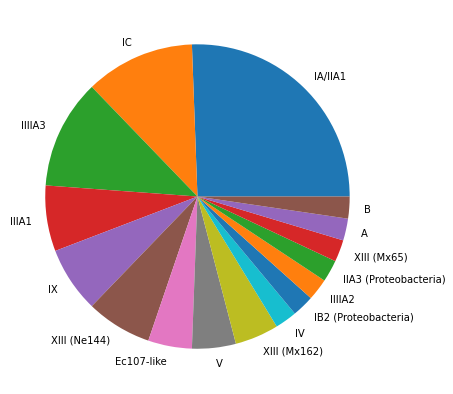

In [67]:
# visualization!
from matplotlib import pyplot as plt
fig = plt.figure(figsize =(7, 7))
plt.pie(fam_freq.values, labels = fam_freq.index)
plt.show()